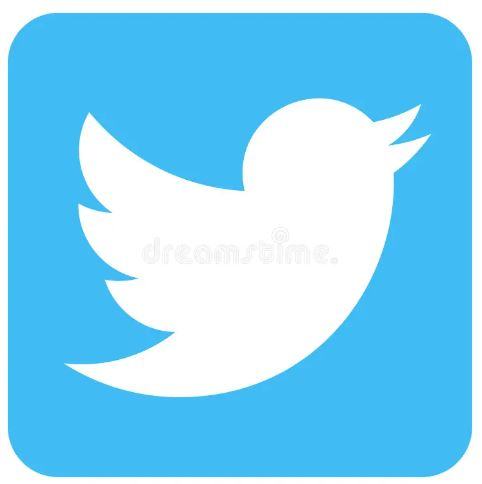

***Analaysis of Comments in Twitter***



Text Preprocessing

In [ ]:
# set path directory to specified folder (after mounting Gdrive)
#import os
# os.chdir('drive/MyDrive/Colab Notebooks/MDMS Assignment 2')
#os.getcwd()

In [ ]:
# import libraries
import pandas as pd
import numpy as np

In [ ]:
# import dataset
#df = pd.read_csv("Sentiment.csv")
#df.head()

In [ ]:
df = pd.read_csv("C:\\Users\\USER\\Desktop\\Sentiment.csv")
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


**Data Exploration**

In [ ]:
df.columns

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
senti = df[["id","text","sentiment"]]
senti.head()

,id,text,sentiment
0,1,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,2,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,3,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,4,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,5,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [ ]:
# check for missing value
senti.isnull().sum()

id           0
text         0
sentiment    0
dtype: int64

In [ ]:
# summary statistics
# number of labelled tweets is 13871
senti.describe(include="all")

,id,text,sentiment
count,13871.000000,13871,13871
unique,NaN,10402,3
top,NaN,RT @RWSurferGirl: Jeb Bush reminds me of eleva...,Negative
freq,NaN,161,8493
mean,6936.000000,NaN,NaN
std,4004.357127,NaN,NaN
min,1.000000,NaN,NaN
25%,3468.500000,NaN,NaN
50%,6936.000000,NaN,NaN
75%,10403.500000,NaN,NaN


In [ ]:
# distribution of sentiment polarity
senti["sentiment"].value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

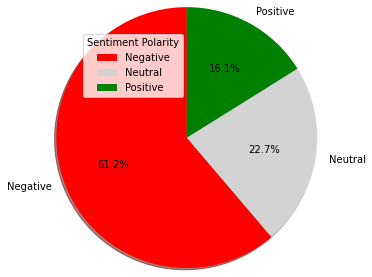

In [ ]:
# data visualization with pie chart
sentiment_count = senti["sentiment"].value_counts()
mycolors = ["r","lightgrey","g"]
plt.pie(sentiment_count, labels=sentiment_count.index, autopct="%1.1f%%",shadow=True,startangle=90, radius=1.5 ,colors=mycolors)
plt.legend(title="Sentiment Polarity")
plt.show()

**Text Normalization / General Text Cleaning**

In [ ]:
!pip install emoji

In [ ]:
import re
import emoji

In [ ]:
def cleaning_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter features
  tweet = re.sub('RT\s+', "", tweet) # replace retweet tag with empty string
  tweet = re.sub('\B@\w+', "", tweet) # replace user tag with empty tag
  tweet = emoji.demojize(tweet)
  tweet = re.sub('(http|https):\/\/\S+', "", tweet) # replace url with empty string
  tweet = re.sub('#+', "", tweet) # replace hashtag with empty string

  if verbose: print("Post Twitter cleaning tweet: {}".format(tweet))

  return tweet

In [ ]:
# apply cleaning process to each row of dataframe
senti["clean_text"]= senti["text"].apply(cleaning_tweet) # use .apply()
senti.head()

<ipython-input-15-043c6f7e0e17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["clean_text"]= senti["text"].apply(cleaning_tweet) # use .apply()


,id,text,sentiment,clean_text
0,1,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,: How did everyone feel about the Climate Chan...
1,2,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,: Didn't catch the full GOPdebate last night. ...
2,3,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,: No mention of Tamir Rice and the GOPDebate w...
3,4,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,: That Carly Fiorina is trending -- hours afte...
4,5,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,: GOPDebate w/ delivered the highest ratings ...


In [ ]:
# check the tweets
senti.loc[:,"clean_text"].sample(10)

1561     Conservatives CANT POSSIBLY Support a Candidat...
7943     Sen. Perry calls for "aviation assets" (means ...
2726     : Tonight we learned that  thinks he can remov...
653      : Unlike GOPDebate we'll talk race, activism B...
9686     : I'd really like to see how long each candida...
9885     If America is in such horrible shape, why are ...
10294    : Cruz: hardball ?\nTrump: smear ?\nRubio: har...
9357     : Thanks Fox News, you're raising  's ratings....
8872     : We the American people pick the next Preside...
1654     Even the media doesn't get it,  No one won las...
Name: clean_text, dtype: object

In [ ]:
# install tweet processing tool
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p

In [ ]:
# another cleaning approach (preprocessor library)
senti["clean_text2"]= senti["text"].apply(p.clean)

<ipython-input-19-90b2b3c2a531>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["clean_text2"]= senti["text"].apply(p.clean)


In [ ]:
# compare the results
senti.head()

,id,text,sentiment,clean_text,clean_text2
0,1,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,: How did everyone feel about the Climate Chan...,: How did everyone feel about the Climate Chan...
1,2,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,: Didn't catch the full GOPdebate last night. ...,: Didn't catch the full last night. Here are s...
2,3,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,: No mention of Tamir Rice and the GOPDebate w...,: No mention of Tamir Rice and the was held in...
3,4,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,: That Carly Fiorina is trending -- hours afte...,: That Carly Fiorina is trending -- hours afte...
4,5,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,: GOPDebate w/ delivered the highest ratings ...,: w/ delivered the highest ratings in the hist...


In [ ]:
senti.loc[:,"clean_text2"].sample(10)

10896    Let people fight in the military they've been ...
928         I thought did an awesome job at the personally
12236    : Jeb Bush reminds me of elevator music. You h...
5866     : "I defend your right to do this" - every can...
11371    : and need to take control of this debate, the...
7296     : it's such a low bar we set, but I was mostly...
5420     : Waiting for at 's Jewish deli in Cleveland d...
11772    : Ask Trump a legitimate question. Look at Wal...
4450     : All the difference in the world bet/unaccomp...
8855     : That moment you realize you're watching Fox ...
Name: clean_text2, dtype: object

In [ ]:
!pip install contractions

In [ ]:
# import packages
import contractions
import string

In [ ]:
 def fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [ ]:
def cleaning_tweet2(tweet):

 tweet = tweet.replace("\d+", "") # removes Numbers
 tweet = tweet.lower() # lower case
 tweet = fix_contractions(tweet) # replace contractions
 tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', "", tweet) # replace punctuation repetition
 tweet = re.sub(r'[^\w\s]', "", tweet) # remove punctuations
 tweet = re.sub(r'\n', " ", tweet) # replace line breaks with whitespace
 tweet = re.sub(r'(.)\1+', r'\1\1', tweet) # replace word repetition

 return tweet

In [ ]:
# apply additional cleaning process to each row of dataframe
senti["clean_text3"]= senti["clean_text"].apply(cleaning_tweet2) # use .apply()
senti.head()

<ipython-input-26-b654dd416b34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["clean_text3"]= senti["clean_text"].apply(cleaning_tweet2) # use .apply()


,id,text,sentiment,clean_text,clean_text2,clean_text3
0,1,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,: How did everyone feel about the Climate Chan...,: How did everyone feel about the Climate Chan...,how did everyone feel about the climate chang...
1,2,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,: Didn't catch the full GOPdebate last night. ...,: Didn't catch the full last night. Here are s...,did not catch the full gopdebate last night h...
2,3,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,: No mention of Tamir Rice and the GOPDebate w...,: No mention of Tamir Rice and the was held in...,no mention of tamir rice and the gopdebate wa...
3,4,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,: That Carly Fiorina is trending -- hours afte...,: That Carly Fiorina is trending -- hours afte...,that carly fiorina is trending hours after h...
4,5,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,: GOPDebate w/ delivered the highest ratings ...,: w/ delivered the highest ratings in the hist...,gopdebate w delivered the highest ratings in...


In [ ]:
# clean_text3 appears to be very clean text, better than clean_text2
# thus custom-built functions for text cleaning is preferred
senti.loc[:,"clean_text3"].sample(50)

11709     thanks fox news you are raising  s ratings un...
510        gets powerful response from  focus group kel...
2782      i would love a fiorina rubio huckabee walker ...
11599     the candidates do not have to attack  fox is ...
484       love that cruz introduced a bill to strip cit...
5112     just as we get the world we deserve the gop ge...
1235     can we stop making sweeping statthements about...
830            but what about the next 10 words  gopdebate
6204      just donated 9  rock on carly gopdebate cleve...
2094       payasoorpresident needs to trend re gopdebat...
8225      women should start protesting gopdebates miso...
6910               hey i feel am left out in the gopdebate
10662     from today to the time the next president has...
7137     actually i do not gopdebate sucked but last ti...
333      meet the new darling of the left  megyn gotcha...
5489                       so there is this gopdebate cnn 
7744      i figured megyn kellys last question would be.

**Tokenization**

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def tokenize_tweet(tweet):
  tokens = word_tokenize(tweet)
  return tokens

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'no', 'with', 'is', "couldn't", 'further', 'aren', 'about', 'needn', 'have', 'out', 'if', 'your', 'yourselves', 'herself', 'again', 'more', 'ourselves', 'other', 'him', 'too', 'were', 'the', 'their', 'didn', 'ma', 'by', 'from', 'has', 'couldn', 'then', 'her', "doesn't", "mustn't", 'whom', 'there', 'doesn', 'until', 'hers', "hasn't", 'those', 'below', "mightn't", "haven't", 'who', "you'll", 'in', 'he', 'why', 'did', 'shan', 'where', 'few', 'y', 'does', 'under', 'an', 'it', 'i', 'ain', 'hadn', "shan't", 'very', 'what', 'o', 'are', "shouldn't", 'before', 'such', 'won', 'she', 'how', 'themselves', "won't", 'on', 'll', "you've", 'we', 'between', "needn't", 'of', 'not', 'ours', 'yourself', 'or', 'any', "wouldn't", 'as', 'same', 'off', 'our', 'hasn', 'when', 'during', 'yours', 'wouldn', 'some', 'a', "didn't", 'should', 'can', 'doing', 'but', 'for', 'through', 'into', 'nor', 'do', 'these', 'am', 'be', "wasn't", 'm', 'while', 'his', 'than', 'because', 'now', "that'll", 'own', 'down', "you'd", 

In [ ]:
stop_words.discard('not')
print(stop_words)

{'no', 'with', 'is', "couldn't", 'further', 'aren', 'about', 'needn', 'have', 'out', 'if', 'your', 'yourselves', 'herself', 'again', 'more', 'ourselves', 'other', 'him', 'too', 'were', 'the', 'their', 'didn', 'ma', 'by', 'from', 'has', 'couldn', 'then', 'her', "doesn't", "mustn't", 'whom', 'there', 'doesn', 'until', 'hers', "hasn't", 'those', 'below', "mightn't", "haven't", 'who', "you'll", 'in', 'he', 'why', 'did', 'shan', 'where', 'few', 'y', 'does', 'under', 'an', 'it', 'i', 'ain', 'hadn', "shan't", 'very', 'what', 'o', 'are', "shouldn't", 'before', 'such', 'won', 'she', 'how', 'themselves', "won't", 'on', 'll', "you've", 'we', 'between', "needn't", 'of', 'ours', 'yourself', 'or', 'any', "wouldn't", 'as', 'same', 'off', 'our', 'hasn', 'when', 'during', 'yours', 'wouldn', 'some', 'a', "didn't", 'should', 'can', 'doing', 'but', 'for', 'through', 'into', 'nor', 'do', 'these', 'am', 'be', "wasn't", 'm', 'while', 'his', 'than', 'because', 'now', "that'll", 'own', 'down', "you'd", 'mustn'

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
snowball_stemmer = SnowballStemmer('english')

In [ ]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [ ]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):

  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation] # remove punctuation

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()] # remove alphabet

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words] # remove stopwords

  return token_list

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's'

**with Stemming**

In [ ]:
def token_all(tweet):

  # Tokenization and Stemming
  token = custom_tokenize(tweet, keep_punct=False,keep_stop=False,keep_alnum=False)
  stemmer = SnowballStemmer("english")
  stem = stem_tokens(token, stemmer)

  return stem

In [ ]:
# apply tokenize and stemming process to each row of dataframe
senti["tokens"]= senti["clean_text3"].apply(token_all) # use .apply()
senti.head()

<ipython-input-40-7e2b9ffe91bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["tokens"]= senti["clean_text3"].apply(token_all) # use .apply()


,id,text,sentiment,clean_text,clean_text2,clean_text3,tokens
0,1,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,: How did everyone feel about the Climate Chan...,: How did everyone feel about the Climate Chan...,how did everyone feel about the climate chang...,"[everyon, feel, climat, chang, question, last,..."
1,2,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,: Didn't catch the full GOPdebate last night. ...,: Didn't catch the full last night. Here are s...,did not catch the full gopdebate last night h...,"[not, catch, full, gopdeb, last, night, scott,..."
2,3,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,: No mention of Tamir Rice and the GOPDebate w...,: No mention of Tamir Rice and the was held in...,no mention of tamir rice and the gopdebate wa...,"[mention, tamir, rice, gopdeb, held, cleveland..."
3,4,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,: That Carly Fiorina is trending -- hours afte...,: That Carly Fiorina is trending -- hours afte...,that carly fiorina is trending hours after h...,"[car, fiorina, trend, hour, debat, men, justco..."
4,5,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,: GOPDebate w/ delivered the highest ratings ...,: w/ delivered the highest ratings in the hist...,gopdebate w delivered the highest ratings in...,"[gopdeb, w, deliv, highest, rate, histori, pre..."


**with Lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Define function to lemmatize each word with its POS tag

# POS_TAGGER_FUNCTION : TYPE 1
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [ ]:
# tokenize the sentence and find the POS tag for each token
twit = "i just saw my political science teacher teaching on the class"
pos_tagged = nltk.pos_tag(nltk.word_tokenize(twit))
pos_tagged

[('i', 'NN'),
 ('just', 'RB'),
 ('saw', 'VBD'),
 ('my', 'PRP$'),
 ('political', 'JJ'),
 ('science', 'NN'),
 ('teacher', 'NN'),
 ('teaching', 'VBG'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('class', 'NN')]

In [ ]:
# we use our own pos_tagger function to make things simpler to understand.
wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
print(wordnet_tagged)

[('i', 'n'), ('just', 'r'), ('saw', 'v'), ('my', None), ('political', 'a'), ('science', 'n'), ('teacher', 'n'), ('teaching', 'v'), ('on', None), ('the', None), ('class', 'n')]


In [ ]:
lemmatized_sentence = []
lemmatizer = WordNetLemmatizer() # wordnet module
for word, tag in wordnet_tagged:
    if tag is None:
        # if there is no available tag, append the token as is
        lemmatized_sentence.append(word)
    else:
        # else use the tag to lemmatize the token
        lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
lemmatized_sentence = " ".join(lemmatized_sentence)

In [ ]:
lemmatized_sentence

'i just saw my political science teacher teach on the class'

In [ ]:
custom_tokenize(lemmatized_sentence)

['saw', 'political', 'science', 'teacher', 'teach', 'class']

In [ ]:
def token_all_lemma2(tweet):

  # Lemmatization and Tokenization
  pos_tagged = nltk.pos_tag(nltk.word_tokenize(tweet))
  wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
  lemmatizer = WordNetLemmatizer()
  ls=[]
  for word, tag in wordnet_tagged:
    if tag is None:
        # if there is no available tag, append the token as is
        ls.append(word)
    else:
        # else use the tag to lemmatize the token
        ls.append(lemmatizer.lemmatize(word, tag))

  sentence = " ".join(ls)
  tokens = custom_tokenize(sentence, keep_punct=False,keep_stop=False,keep_alnum=False)

  return tokens

In [ ]:
token_all_lemma2(twit)

['saw', 'political', 'science', 'teacher', 'teach', 'class']

In [ ]:
lemmatizer = WordNetLemmatizer() # wordnet module

In [ ]:
def lemmatize_tokens(tokens, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, ))
  return token_list

In [ ]:
def token_all_lemma(tweet):

  # Tokenization and Lemmatization
  token = custom_tokenize(tweet, keep_punct=False,keep_stop=False,keep_alnum=False)
  lemmatizer = WordNetLemmatizer()
  lemma = lemmatize_tokens(token, lemmatizer)

  return lemma

In [ ]:
# apply tokenize and lemma process to each row of dataframe
senti["tokens2"]= senti["clean_text3"].apply(token_all_lemma) # use .apply()
senti.head()

<ipython-input-53-935530c0b4b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["tokens2"]= senti["clean_text3"].apply(token_all_lemma) # use .apply()


,id,text,sentiment,clean_text,clean_text2,clean_text3,tokens,tokens2
0,1,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,: How did everyone feel about the Climate Chan...,: How did everyone feel about the Climate Chan...,how did everyone feel about the climate chang...,"[everyon, feel, climat, chang, question, last,...","[everyone, feel, climate, change, question, la..."
1,2,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,: Didn't catch the full GOPdebate last night. ...,: Didn't catch the full last night. Here are s...,did not catch the full gopdebate last night h...,"[not, catch, full, gopdeb, last, night, scott,...","[not, catch, full, gopdebate, last, night, sco..."
2,3,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,: No mention of Tamir Rice and the GOPDebate w...,: No mention of Tamir Rice and the was held in...,no mention of tamir rice and the gopdebate wa...,"[mention, tamir, rice, gopdeb, held, cleveland...","[mention, tamir, rice, gopdebate, held, clevel..."
3,4,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,: That Carly Fiorina is trending -- hours afte...,: That Carly Fiorina is trending -- hours afte...,that carly fiorina is trending hours after h...,"[car, fiorina, trend, hour, debat, men, justco...","[carly, fiorina, trending, hour, debate, men, ..."
4,5,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,: GOPDebate w/ delivered the highest ratings ...,: w/ delivered the highest ratings in the hist...,gopdebate w delivered the highest ratings in...,"[gopdeb, w, deliv, highest, rate, histori, pre...","[gopdebate, w, delivered, highest, rating, his..."


In [ ]:
# apply tokenize and lemma process to each row of dataframe
senti["tokens3"]= senti["clean_text3"].apply(token_all_lemma2) # use .apply()
senti.head()

<ipython-input-54-eadcbed0c122>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["tokens3"]= senti["clean_text3"].apply(token_all_lemma2) # use .apply()


,id,text,sentiment,clean_text,clean_text2,clean_text3,tokens,tokens2,tokens3
0,1,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,: How did everyone feel about the Climate Chan...,: How did everyone feel about the Climate Chan...,how did everyone feel about the climate chang...,"[everyon, feel, climat, chang, question, last,...","[everyone, feel, climate, change, question, la...","[everyone, feel, climate, change, question, la..."
1,2,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,: Didn't catch the full GOPdebate last night. ...,: Didn't catch the full last night. Here are s...,did not catch the full gopdebate last night h...,"[not, catch, full, gopdeb, last, night, scott,...","[not, catch, full, gopdebate, last, night, sco...","[not, catch, full, gopdebate, last, night, sco..."
2,3,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,: No mention of Tamir Rice and the GOPDebate w...,: No mention of Tamir Rice and the was held in...,no mention of tamir rice and the gopdebate wa...,"[mention, tamir, rice, gopdeb, held, cleveland...","[mention, tamir, rice, gopdebate, held, clevel...","[mention, tamir, rice, gopdebate, hold, clevel..."
3,4,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,: That Carly Fiorina is trending -- hours afte...,: That Carly Fiorina is trending -- hours afte...,that carly fiorina is trending hours after h...,"[car, fiorina, trend, hour, debat, men, justco...","[carly, fiorina, trending, hour, debate, men, ...","[carly, fiorina, trend, hour, debate, men, jus..."
4,5,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,: GOPDebate w/ delivered the highest ratings ...,: w/ delivered the highest ratings in the hist...,gopdebate w delivered the highest ratings in...,"[gopdeb, w, deliv, highest, rate, histori, pre...","[gopdebate, w, delivered, highest, rating, his...","[gopdebate, w, deliver, high, rating, history,..."


In [ ]:
# comparing tokens processed by stemming (left) and lemmatization (right)
senti[["tokens","tokens3"]]

,tokens,tokens3
0,"[everyon, feel, climat, chang, question, last,...","[everyone, feel, climate, change, question, la..."
1,"[not, catch, full, gopdeb, last, night, scott,...","[not, catch, full, gopdebate, last, night, sco..."
2,"[mention, tamir, rice, gopdeb, held, cleveland...","[mention, tamir, rice, gopdebate, hold, clevel..."
3,"[car, fiorina, trend, hour, debat, men, justco...","[carly, fiorina, trend, hour, debate, men, jus..."
4,"[gopdeb, w, deliv, highest, rate, histori, pre...","[gopdebate, w, deliver, high, rating, history,..."
...,...,...
13866,"[love, see, men, never, face, pregnanc, talk, ...","[love, see, men, never, face, pregnancy, talk,..."
13867,"[thought, huckabe, exceed, expect, gopdeb, imw...","[think, huckabee, exceed, expectation, gopdeba..."
13868,"[tedcruz, presid, alway, tell, truth, said, wo...","[tedcruz, president, always, tell, truth, say,..."
13869,"[gopdeb, donald, trump, say, not, time, polit,...","[gopdebate, donald, trump, say, not, time, pol..."


**Term Frequency Count**

In [ ]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [ ]:
freqs = {}
for lst in corpus:
  for w in lst:
    if w in freqs:
      freqs[w] += 1
    else:
      freqs[w] = 1

freqs

{'i': 5,
 'love': 2,
 'nlp': 1,
 'miss': 1,
 'you': 3,
 'are': 1,
 'happy': 1,
 'to': 1,
 'learn': 1,
 'lost': 1,
 'my': 1,
 'computer': 1,
 'am': 1,
 'so': 1,
 'sad': 1}

In [ ]:
wordcount = []
for k,v in freqs.items():
  wordcount.append((v,k))

wordcount

[(5, 'i'),
 (2, 'love'),
 (1, 'nlp'),
 (1, 'miss'),
 (3, 'you'),
 (1, 'are'),
 (1, 'happy'),
 (1, 'to'),
 (1, 'learn'),
 (1, 'lost'),
 (1, 'my'),
 (1, 'computer'),
 (1, 'am'),
 (1, 'so'),
 (1, 'sad')]

In [ ]:
wordcount = sorted(wordcount, reverse=True)
wordcount

[(5, 'i'),
 (3, 'you'),
 (2, 'love'),
 (1, 'to'),
 (1, 'so'),
 (1, 'sad'),
 (1, 'nlp'),
 (1, 'my'),
 (1, 'miss'),
 (1, 'lost'),
 (1, 'learn'),
 (1, 'happy'),
 (1, 'computer'),
 (1, 'are'),
 (1, 'am')]

In [ ]:
# build custom word count
def word_freqs(corpus):
  freqs = {}  # create dictionary of word count
  for lst in corpus:
    for w in lst:
      if w in freqs:
        freqs[w] += 1
      else:
        freqs[w] = 1

  wordcount = []
  for k,v in freqs.items():
    wordcount.append((v,k)) # add to list

  wordcount = sorted(wordcount, reverse=True) # sort descending
  return wordcount

In [ ]:
word_freqs(corpus)

[(5, 'i'),
 (3, 'you'),
 (2, 'love'),
 (1, 'to'),
 (1, 'so'),
 (1, 'sad'),
 (1, 'nlp'),
 (1, 'my'),
 (1, 'miss'),
 (1, 'lost'),
 (1, 'learn'),
 (1, 'happy'),
 (1, 'computer'),
 (1, 'are'),
 (1, 'am')]

In [ ]:
# term frequency from stemming (all sentiments)
word_freqs(senti["tokens"])

[(14328, 'gopdeb'),
 (3093, 'not'),
 (1903, 'trump'),
 (1319, 'fox'),
 (1252, 'debat'),
 (1159, 'candid'),
 (1028, 'amp'),
 (922, 'night'),
 (908, 'news'),
 (892, 'last'),
 (779, 'like'),
 (733, 'question'),
 (704, 'get'),
 (665, 'gop'),
 (640, 'watch'),
 (630, 'peopl'),
 (597, 'think'),
 (592, 'jeb'),
 (587, 'bush'),
 (570, 'would'),
 (569, 'republican'),
 (565, 'one'),
 (541, 'ask'),
 (518, 'want'),
 (502, 'need'),
 (486, 'say'),
 (475, 'im'),
 (464, 'presid'),
 (460, 'go'),
 (445, 'god'),
 (442, 'cruz'),
 (428, 'talk'),
 (424, 'donald'),
 (422, 'right'),
 (407, 'chris'),
 (386, 'look'),
 (383, 'time'),
 (381, 'rubio'),
 (372, 'know'),
 (371, 'realli'),
 (370, 'wallac'),
 (350, 'carson'),
 (349, 'women'),
 (344, 'said'),
 (330, 'next'),
 (328, 'tonight'),
 (324, 'ththem'),
 (316, 'us'),
 (315, 'make'),
 (311, 'job'),
 (310, 'huckabe'),
 (305, 'american'),
 (301, 'tri'),
 (299, 'pick'),
 (294, 'speak'),
 (287, 'see'),
 (275, 'face'),
 (270, 'take'),
 (270, 'anyon'),
 (265, 'fair'),
 (

In [ ]:
# term frequnecy of lemmatization (all sentiments)
word_freqs(senti["tokens3"])

[(9014, 'gopdebate'),
 (5268, 'gopdebates'),
 (3093, 'not'),
 (1883, 'trump'),
 (1315, 'fox'),
 (1238, 'debate'),
 (1159, 'candidate'),
 (1028, 'amp'),
 (947, 'get'),
 (914, 'night'),
 (908, 'news'),
 (890, 'last'),
 (830, 'say'),
 (765, 'like'),
 (733, 'question'),
 (663, 'gop'),
 (660, 'think'),
 (629, 'people'),
 (626, 'watch'),
 (586, 'jeb'),
 (574, 'bush'),
 (571, 'go'),
 (570, 'would'),
 (565, 'one'),
 (543, 'republican'),
 (539, 'ask'),
 (516, 'want'),
 (502, 'need'),
 (475, 'im'),
 (446, 'president'),
 (445, 'god'),
 (442, 'make'),
 (427, 'woman'),
 (427, 'talk'),
 (420, 'donald'),
 (416, 'right'),
 (414, 'cruz'),
 (407, 'chris'),
 (406, 'know'),
 (396, 'win'),
 (385, 'look'),
 (381, 'time'),
 (378, 'rubio'),
 (371, 'really'),
 (368, 'wallace'),
 (367, 'see'),
 (350, 'carson'),
 (336, 'take'),
 (330, 'next'),
 (325, 'good'),
 (324, 'tonight'),
 (324, 'ththem'),
 (320, 'come'),
 (318, 'us'),
 (314, 'speak'),
 (311, 'job'),
 (303, 'huckabee'),
 (301, 'give'),
 (299, 'try'),
 (299

**Vectorization**

In [ ]:
!pip install scikit-learn

**Bag of Words**

In [ ]:
# Bag of Words approach
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build BOW vectorizer with the corpus
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [ ]:
# Bag of Words approach
from sklearn.feature_extraction.text import CountVectorizer

# build BOW vectorizer with the corpus
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

# use fit_cv function to fit vectorizer on the corpus
# model to transform corpus into matrix
cv_vect = fit_cv(senti["tokens"])

# get vectorizer features in matrix columns
ft = cv_vect.get_feature_names()
print(len(ft), " features", ft)

# transform corpus into matrix
cv_mtx = cv_vect.transform(senti["tokens"])
print("Matrix shape is: {}".format(cv_mtx.shape))

# convert matrix to array (representation)
cv_mtx.toarray()

8978  features ['aa', 'aand', 'aaron', 'ab', 'abandon', 'abbott', 'abc', 'abe', 'abhorr', 'abil', 'abl', 'ableg', 'abo', 'abolish', 'abort', 'abortioni', 'abortioninduc', 'abortionismurd', 'abortus', 'abou', 'abound', 'aboutlastnight', 'abraham', 'abroad', 'absenc', 'absofuckinglut', 'absolut', 'absurd', 'absurdwith', 'abt', 'abus', 'abysm', 'ac', 'aca', 'accent', 'accept', 'access', 'accessori', 'accid', 'accident', 'accomplish', 'accomplishmentsar', 'accord', 'account', 'acct', 'accu', 'accur', 'accuraci', 'accus', 'ace', 'ach', 'achiev', 'achievth', 'ack', 'ackit', 'acr', 'across', 'act', 'actin', 'action', 'actionsso', 'activ', 'activist', 'actoflov', 'actonclim', 'actor', 'actshow', 'actual', 'ad', 'adam', 'adamkarethem', 'adapt', 'add', 'addict', 'address', 'adelson', 'adhes', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adobo', 'adolf', 'adopt', 'adorb', 'adr', 'adult', 'advanc', 'advancth', 'advantag', 'adventur', 'advertis', 'advetis', 'advic', 'advil', 'advis', 'advisor

C:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Matrix shape is: (13871, 8978)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

with Stemming

In [ ]:
# use fit_cv function to fit vectorizer on the corpus
# model to transform corpus into matrix
cv_vect = fit_cv(senti["tokens"])
cv_vect

CountVectorizer(preprocessor=<function fit_cv.<locals>.<lambda> at 0x0000021AE6543E50>,
                tokenizer=<function fit_cv.<locals>.<lambda> at 0x0000021AE4158430>)

In [ ]:
# get vectorizer features in matrix columns
ft = cv_vect.get_feature_names()
print(len(ft), " features", ft)

8978  features ['aa', 'aand', 'aaron', 'ab', 'abandon', 'abbott', 'abc', 'abe', 'abhorr', 'abil', 'abl', 'ableg', 'abo', 'abolish', 'abort', 'abortioni', 'abortioninduc', 'abortionismurd', 'abortus', 'abou', 'abound', 'aboutlastnight', 'abraham', 'abroad', 'absenc', 'absofuckinglut', 'absolut', 'absurd', 'absurdwith', 'abt', 'abus', 'abysm', 'ac', 'aca', 'accent', 'accept', 'access', 'accessori', 'accid', 'accident', 'accomplish', 'accomplishmentsar', 'accord', 'account', 'acct', 'accu', 'accur', 'accuraci', 'accus', 'ace', 'ach', 'achiev', 'achievth', 'ack', 'ackit', 'acr', 'across', 'act', 'actin', 'action', 'actionsso', 'activ', 'activist', 'actoflov', 'actonclim', 'actor', 'actshow', 'actual', 'ad', 'adam', 'adamkarethem', 'adapt', 'add', 'addict', 'address', 'adelson', 'adhes', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adobo', 'adolf', 'adopt', 'adorb', 'adr', 'adult', 'advanc', 'advancth', 'advantag', 'adventur', 'advertis', 'advetis', 'advic', 'advil', 'advis', 'advisor

In [ ]:
# transform corpus into matrix
cv_mtx = cv_vect.transform(senti["tokens"])
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (13871, 8978)


In [ ]:
# convert matrix to array (representation)
cv_mtx.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

with Lemma

In [ ]:
cv_vect_lemma = fit_cv(senti["tokens3"])
cv_vect_lemma

CountVectorizer(preprocessor=<function fit_cv.<locals>.<lambda> at 0x0000021AF4C9D550>,
                tokenizer=<function fit_cv.<locals>.<lambda> at 0x0000021AF4C9DB80>)

In [ ]:
ft_lemma = cv_vect_lemma.get_feature_names()
print(len(ft_lemma), " features", ft_lemma)

10091  features ['aa', 'aand', 'aaron', 'ab', 'abandon', 'abbott', 'abc', 'abe', 'abhorrent', 'ability', 'able', 'ableg', 'abo', 'abolish', 'abort', 'abortion', 'abortioni', 'abortioninducing', 'abortionismurder', 'abortus', 'abou', 'abound', 'aboutlastnight', 'abraham', 'abroad', 'absence', 'absofuckinglutely', 'absolute', 'absolutely', 'absurd', 'absurdwith', 'abt', 'abuse', 'abuser', 'abusive', 'abysmal', 'ac', 'aca', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessible', 'accessory', 'accident', 'accidentally', 'accomplish', 'accomplishment', 'accomplishmentsare', 'accord', 'accordingly', 'account', 'accountability', 'accountable', 'acct', 'accu', 'accuracy', 'accurate', 'accurately', 'accusation', 'accuse', 'ace', 'ache', 'achieve', 'achievthement', 'ack', 'ackit', 'acre', 'across', 'act', 'actin', 'action', 'actionsso', 'active', 'actively', 'activism', 'activist', 'activity', 'actoflove', 'actonclimate', 'actor', 'actshow', 'actual', 'ac

In [ ]:
# transform corpus into matrix
cv_mtx_lemma = cv_vect_lemma.transform(senti["tokens3"])
print("Matrix shape is: {}".format(cv_mtx_lemma.shape))

Matrix shape is: (13871, 10091)


In [ ]:
# convert matrix to array (representation)
cv_mtx_lemma.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Term Frequency - Inverse Document Frequency (TF-IDF)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# build TFiDF vectorizer with corpus
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

with Stemming

In [ ]:
# transform corpus into matrix
tf_vect = fit_tfidf(senti["tokens"])
tf_mtx = tf_vect.transform(senti["tokens"])

In [ ]:
# get feature names (matrix columns)
ft2 = tf_vect.get_feature_names()
print(len(ft2), " features", ft2)

8978  features ['aa', 'aand', 'aaron', 'ab', 'abandon', 'abbott', 'abc', 'abe', 'abhorr', 'abil', 'abl', 'ableg', 'abo', 'abolish', 'abort', 'abortioni', 'abortioninduc', 'abortionismurd', 'abortus', 'abou', 'abound', 'aboutlastnight', 'abraham', 'abroad', 'absenc', 'absofuckinglut', 'absolut', 'absurd', 'absurdwith', 'abt', 'abus', 'abysm', 'ac', 'aca', 'accent', 'accept', 'access', 'accessori', 'accid', 'accident', 'accomplish', 'accomplishmentsar', 'accord', 'account', 'acct', 'accu', 'accur', 'accuraci', 'accus', 'ace', 'ach', 'achiev', 'achievth', 'ack', 'ackit', 'acr', 'across', 'act', 'actin', 'action', 'actionsso', 'activ', 'activist', 'actoflov', 'actonclim', 'actor', 'actshow', 'actual', 'ad', 'adam', 'adamkarethem', 'adapt', 'add', 'addict', 'address', 'adelson', 'adhes', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adobo', 'adolf', 'adopt', 'adorb', 'adr', 'adult', 'advanc', 'advancth', 'advantag', 'adventur', 'advertis', 'advetis', 'advic', 'advil', 'advis', 'advisor

In [ ]:
print("Matrix shape is: {}".format(tf_mtx.shape))

Matrix shape is: (13871, 8978)


In [ ]:
tf_mtx.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

with Lemma

In [ ]:
# transform corpus into matrix
tf_vect_lemma = fit_tfidf(senti["tokens3"])
tf_mtx_lemma = tf_vect_lemma.transform(senti["tokens3"])

In [ ]:
# get feature names (matrix columns)
ft2_lemma = tf_vect_lemma.get_feature_names()
print(len(ft2_lemma), " features", ft2_lemma)
print("Matrix shape is: {}".format(tf_mtx_lemma.shape))

10091  features ['aa', 'aand', 'aaron', 'ab', 'abandon', 'abbott', 'abc', 'abe', 'abhorrent', 'ability', 'able', 'ableg', 'abo', 'abolish', 'abort', 'abortion', 'abortioni', 'abortioninducing', 'abortionismurder', 'abortus', 'abou', 'abound', 'aboutlastnight', 'abraham', 'abroad', 'absence', 'absofuckinglutely', 'absolute', 'absolutely', 'absurd', 'absurdwith', 'abt', 'abuse', 'abuser', 'abusive', 'abysmal', 'ac', 'aca', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessible', 'accessory', 'accident', 'accidentally', 'accomplish', 'accomplishment', 'accomplishmentsare', 'accord', 'accordingly', 'account', 'accountability', 'accountable', 'acct', 'accu', 'accuracy', 'accurate', 'accurately', 'accusation', 'accuse', 'ace', 'ache', 'achieve', 'achievthement', 'ack', 'ackit', 'acre', 'across', 'act', 'actin', 'action', 'actionsso', 'active', 'actively', 'activism', 'activist', 'activity', 'actoflove', 'actonclimate', 'actor', 'actshow', 'actual', 'ac

In [ ]:
tf_mtx_lemma.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build TFiDF vectorizer with corpus
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

# transform corpus into matrix
tf_vect_lemma = fit_tfidf(senti["tokens3"])
tf_mtx_lemma = tf_vect_lemma.transform(senti["tokens3"])

# get feature names (matrix columns)
ft2_lemma = tf_vect_lemma.get_feature_names()
print(len(ft2_lemma), " features", ft2_lemma)
print("Matrix shape is: {}".format(tf_mtx_lemma.shape))

# convert matrix to array
tf_mtx_lemma.toarray()

10091  features ['aa', 'aand', 'aaron', 'ab', 'abandon', 'abbott', 'abc', 'abe', 'abhorrent', 'ability', 'able', 'ableg', 'abo', 'abolish', 'abort', 'abortion', 'abortioni', 'abortioninducing', 'abortionismurder', 'abortus', 'abou', 'abound', 'aboutlastnight', 'abraham', 'abroad', 'absence', 'absofuckinglutely', 'absolute', 'absolutely', 'absurd', 'absurdwith', 'abt', 'abuse', 'abuser', 'abusive', 'abysmal', 'ac', 'aca', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessible', 'accessory', 'accident', 'accidentally', 'accomplish', 'accomplishment', 'accomplishmentsare', 'accord', 'accordingly', 'account', 'accountability', 'accountable', 'acct', 'accu', 'accuracy', 'accurate', 'accurately', 'accusation', 'accuse', 'ace', 'ache', 'achieve', 'achievthement', 'ack', 'ackit', 'acre', 'across', 'act', 'actin', 'action', 'actionsso', 'active', 'actively', 'activism', 'activist', 'activity', 'actoflove', 'actonclimate', 'actor', 'actshow', 'actual', 'ac

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Implementation of Machine Learning Models

In [ ]:
# assign new datasets name

# Stemming with Bag-of-Words
x1 = cv_mtx.toarray()
# Lemmatization with Bag-of-Words
x2 = cv_mtx_lemma.toarray()
# Stemming with TF-IDF
x3 = tf_mtx.toarray()
# Lemmatization with TF-IDF
x4 = tf_mtx_lemma.toarray()

print(x1.shape, x2.shape, x3.shape, x4.shape)

(13871, 8978) (13871, 10091) (13871, 8978) (13871, 10091)


In [ ]:
# replace the attribute name 'sentiment' by new defined name 'y'
y = senti['sentiment']
y

0         Neutral
1        Positive
2         Neutral
3        Positive
4        Positive
           ...   
13866    Negative
13867    Positive
13868    Positive
13869    Negative
13870    Positive
Name: sentiment, Length: 13871, dtype: object

Split the datasets into test and train datasets before training the ML models (Holdout method is used for performance evaluation)

1. Dataset x1 (Stemming with Bag-of-Words)

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2)
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(11096, 8978) (2775, 8978) (11096,) (2775,)


2. Dataset x2 (Lemmatization with Bag-of-Words)

In [ ]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.2)
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(11096, 10091) (2775, 10091) (11096,) (2775,)


3. Dataset x3 (Stemming with TF-IDF)

In [ ]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.2)
print(x3_train.shape, x3_test.shape, y3_train.shape, y3_test.shape)

(11096, 8978) (2775, 8978) (11096,) (2775,)


4. Dataset x4 (Lemmatization with TF-IDF)

In [ ]:
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y, test_size=0.2)
print(x4_train.shape, x4_test.shape, y4_train.shape, y4_test.shape)

(11096, 10091) (2775, 10091) (11096,) (2775,)


# Naive Bayes (NB)

1. Stemming with Bag-of-Words

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_x1 = MultinomialNB()
NB_x1.fit(x1_train, y1_train)

MultinomialNB()

<AxesSubplot:>

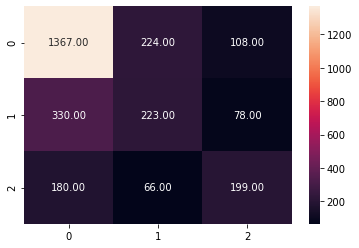

In [ ]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y1_predict_test = NB_x1.predict(x1_test)
CM1 = confusion_matrix(y1_test, y1_predict_test)
import seaborn as sns
sns.heatmap(CM1, annot=True, fmt = '.2f')

In [ ]:
from sklearn.metrics import accuracy_score
NB_x1_prediction = NB_x1.predict(x1_test)
NB_x1_accuracy = accuracy_score(y1_test,NB_x1_prediction)
print("Training Accuracy Score    : ",NB_x1.score(x1_train,y1_train))
print("Validation Accuracy Score : ",NB_x1_accuracy, '\n')
print(classification_report(y1_test, y1_predict_test))

Training Accuracy Score    :  0.7697368421052632
Validation Accuracy Score :  0.6446846846846847 

              precision    recall  f1-score   support

    Negative       0.73      0.80      0.76      1699
     Neutral       0.43      0.35      0.39       631
    Positive       0.52      0.45      0.48       445

    accuracy                           0.64      2775
   macro avg       0.56      0.54      0.54      2775
weighted avg       0.63      0.64      0.63      2775



2. Lemmatization with Bag-of-Words

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_x2 = MultinomialNB()
NB_x2.fit(x2_train, y2_train)

MultinomialNB()

<AxesSubplot:>

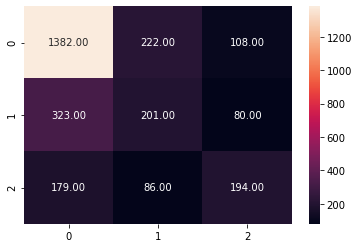

In [ ]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y2_predict_test = NB_x2.predict(x2_test)
CM2 = confusion_matrix(y2_test, y2_predict_test)
import seaborn as sns
sns.heatmap(CM2, annot=True, fmt = '.2f')

In [ ]:
from sklearn.metrics import accuracy_score
NB_x2_prediction = NB_x2.predict(x2_test)
NB_x2_accuracy = accuracy_score(y2_test,NB_x2_prediction)
print("Training Accuracy Score    : ",NB_x2.score(x2_train,y2_train))
print("Validation Accuracy Score : ",NB_x2_accuracy, '\n')
print(classification_report(y2_test, y2_predict_test))

Training Accuracy Score    :  0.7769466474405191
Validation Accuracy Score :  0.6403603603603604 

              precision    recall  f1-score   support

    Negative       0.73      0.81      0.77      1712
     Neutral       0.39      0.33      0.36       604
    Positive       0.51      0.42      0.46       459

    accuracy                           0.64      2775
   macro avg       0.55      0.52      0.53      2775
weighted avg       0.62      0.64      0.63      2775



3. Stemming with TF-IDF

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_x3 = MultinomialNB()
NB_x3.fit(x3_train, y3_train)

MultinomialNB()

<AxesSubplot:>

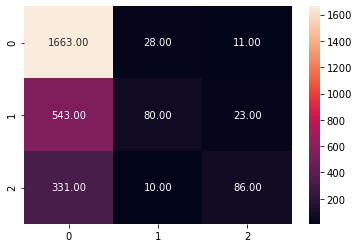

In [ ]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y3_predict_test = NB_x3.predict(x3_test)
CM3 = confusion_matrix(y3_test, y3_predict_test)
import seaborn as sns
sns.heatmap(CM3, annot=True, fmt = '.2f')

In [ ]:
from sklearn.metrics import accuracy_score
NB_x3_prediction = NB_x3.predict(x3_test)
NB_x3_accuracy = accuracy_score(y3_test,NB_x3_prediction)
print("Training Accuracy Score    : ",NB_x3.score(x3_train,y3_train))
print("Validation Accuracy Score : ",NB_x3_accuracy, '\n')
print(classification_report(y3_test, y3_predict_test))

Training Accuracy Score    :  0.6970079307858688
Validation Accuracy Score :  0.6590990990990991 

              precision    recall  f1-score   support

    Negative       0.66      0.98      0.78      1702
     Neutral       0.68      0.12      0.21       646
    Positive       0.72      0.20      0.31       427

    accuracy                           0.66      2775
   macro avg       0.68      0.43      0.44      2775
weighted avg       0.67      0.66      0.58      2775



4. Lemmatization with TF-IDF

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_x4 = MultinomialNB()
NB_x4.fit(x4_train, y4_train)

MultinomialNB()

<AxesSubplot:>

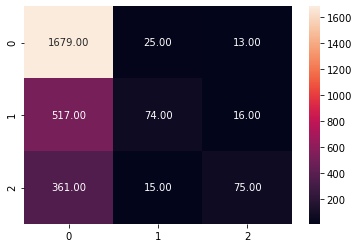

In [ ]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y4_predict_test = NB_x4.predict(x4_test)
CM4 = confusion_matrix(y4_test, y4_predict_test)
import seaborn as sns
sns.heatmap(CM4, annot=True, fmt = '.2f')

In [ ]:
from sklearn.metrics import accuracy_score
NB_x4_prediction = NB_x4.predict(x4_test)
NB_x4_accuracy = accuracy_score(y4_test,NB_x4_prediction)
print("Training Accuracy Score    : ",NB_x4.score(x4_train,y4_train))
print("Validation Accuracy Score : ",NB_x4_accuracy, '\n')
print(classification_report(y4_test, y4_predict_test))

Training Accuracy Score    :  0.695746214852199
Validation Accuracy Score :  0.6587387387387388 

              precision    recall  f1-score   support

    Negative       0.66      0.98      0.79      1717
     Neutral       0.65      0.12      0.21       607
    Positive       0.72      0.17      0.27       451

    accuracy                           0.66      2775
   macro avg       0.68      0.42      0.42      2775
weighted avg       0.67      0.66      0.57      2775



# Support Vector Machine (SVM)

1. Stemming with Bag-of-Words

In [ ]:
from sklearn.svm import SVC
SVM_x1 = SVC()
SVM_x1.fit(x1_train, y1_train)

SVC()

<AxesSubplot:>

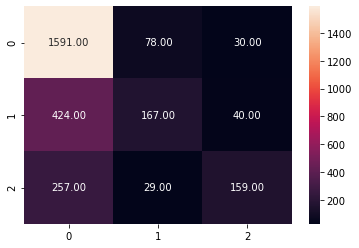

In [ ]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y1_predict_test = SVM_x1.predict(x1_test)
CM1 = confusion_matrix(y1_test, y1_predict_test)
import seaborn as sns
sns.heatmap(CM1, annot=True, fmt = '.2f')

In [ ]:
from sklearn.metrics import accuracy_score
SVM_x1_prediction = SVM_x1.predict(x1_test)
SVM_x1_accuracy = accuracy_score(y1_test,SVM_x1_prediction)
print("Training Accuracy Score    : ",SVM_x1.score(x1_train,y1_train))
print("Validation Accuracy Score : ",SVM_x1_accuracy, '\n')
print(classification_report(y1_test, y1_predict_test))

Training Accuracy Score    :  0.8299387166546504
Validation Accuracy Score :  0.6908108108108109 

              precision    recall  f1-score   support

    Negative       0.70      0.94      0.80      1699
     Neutral       0.61      0.26      0.37       631
    Positive       0.69      0.36      0.47       445

    accuracy                           0.69      2775
   macro avg       0.67      0.52      0.55      2775
weighted avg       0.68      0.69      0.65      2775



2. Lemmatization with Bag-of-Words

In [ ]:
from sklearn.svm import SVC
SVM_x2 = SVC()
SVM_x2.fit(x2_train, y2_train)

SVC()

<AxesSubplot:>

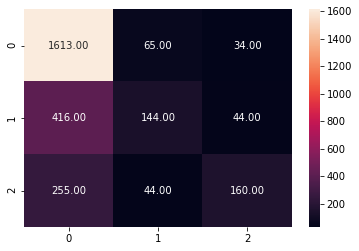

In [ ]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y2_predict_test = SVM_x2.predict(x2_test)
CM2 = confusion_matrix(y2_test, y2_predict_test)
import seaborn as sns
sns.heatmap(CM2, annot=True, fmt = '.2f')

In [ ]:
from sklearn.metrics import accuracy_score
SVM_x2_prediction = SVM_x2.predict(x2_test)
SVM_x2_accuracy = accuracy_score(y2_test,SVM_x2_prediction)
print("Training Accuracy Score    : ",SVM_x2.score(x2_train,y2_train))
print("Validation Accuracy Score : ",SVM_x2_accuracy, '\n')
print(classification_report(y2_test, y2_predict_test))

Training Accuracy Score    :  0.8346250901225667
Validation Accuracy Score :  0.6908108108108109 

              precision    recall  f1-score   support

    Negative       0.71      0.94      0.81      1712
     Neutral       0.57      0.24      0.34       604
    Positive       0.67      0.35      0.46       459

    accuracy                           0.69      2775
   macro avg       0.65      0.51      0.53      2775
weighted avg       0.67      0.69      0.65      2775



3. Stemming with TF-IDF

In [ ]:
from sklearn.svm import SVC
SVM_x3 = SVC()
SVM_x3.fit(x3_train, y3_train)

SVC()

<AxesSubplot:>

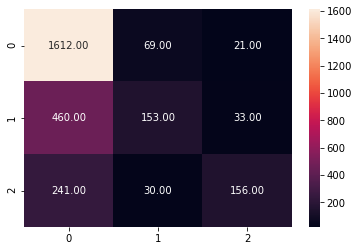

In [ ]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y3_predict_test = SVM_x3.predict(x3_test)
CM3 = confusion_matrix(y3_test, y3_predict_test)
import seaborn as sns
sns.heatmap(CM3, annot=True, fmt = '.2f')

In [ ]:
from sklearn.metrics import accuracy_score
SVM_x3_prediction = SVM_x3.predict(x3_test)
SVM_x3_accuracy = accuracy_score(y3_test,SVM_x3_prediction)
print("Training Accuracy Score    : ",SVM_x3.score(x3_train,y3_train))
print("Validation Accuracy Score : ",SVM_x3_accuracy, '\n')
print(classification_report(y3_test, y3_predict_test))

Training Accuracy Score    :  0.874729632299928
Validation Accuracy Score :  0.6922522522522523 

              precision    recall  f1-score   support

    Negative       0.70      0.95      0.80      1702
     Neutral       0.61      0.24      0.34       646
    Positive       0.74      0.37      0.49       427

    accuracy                           0.69      2775
   macro avg       0.68      0.52      0.54      2775
weighted avg       0.68      0.69      0.65      2775



4. Lemmatization with TF-IDF

In [ ]:
from sklearn.svm import SVC
SVM_x4 = SVC()
SVM_x4.fit(x4_train, y4_train)

SVC()

<AxesSubplot:>

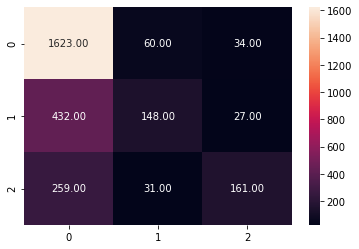

In [ ]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y4_predict_test = SVM_x4.predict(x4_test)
CM4 = confusion_matrix(y4_test, y4_predict_test)
import seaborn as sns
sns.heatmap(CM4, annot=True, fmt = '.2f')

In [ ]:
from sklearn.metrics import accuracy_score
SVM_x4_prediction = SVM_x4.predict(x4_test)
SVM_x4_accuracy = accuracy_score(y4_test,SVM_x4_prediction)
print("Training Accuracy Score    : ",SVM_x4.score(x4_train,y4_train))
print("Validation Accuracy Score : ",SVM_x4_accuracy, '\n')
print(classification_report(y4_test, y4_predict_test))

Training Accuracy Score    :  0.8782444124008651
Validation Accuracy Score :  0.6962162162162162 

              precision    recall  f1-score   support

    Negative       0.70      0.95      0.81      1717
     Neutral       0.62      0.24      0.35       607
    Positive       0.73      0.36      0.48       451

    accuracy                           0.70      2775
   macro avg       0.68      0.52      0.54      2775
weighted avg       0.69      0.70      0.65      2775



# Comparison of Test Accuracy

In [ ]:
models = pd.DataFrame({
    'Model': ['NB_Stem_BoW', 'NB_Lemma_BoW',
              'NB_Stem_TFIDF', 'NB_Lemma_TFIDF',
              'SVM_Stem_BoW', 'SVM_Lemma_BoW',
              'SVM_Stem_TFIDF', 'SVM_Lemma_TFIDF'],
    'Test Accuracy': [NB_x1_accuracy, NB_x2_accuracy,
                      NB_x3_accuracy, NB_x4_accuracy,
                      SVM_x1_accuracy, SVM_x2_accuracy,
                      SVM_x3_accuracy, SVM_x4_accuracy]})

models.sort_values(by='Test Accuracy', ascending=False)

,Model,Test Accuracy
7,SVM_Lemma_TFIDF,0.696216
6,SVM_Stem_TFIDF,0.692252
4,SVM_Stem_BoW,0.690811
5,SVM_Lemma_BoW,0.690811
2,NB_Stem_TFIDF,0.659099
3,NB_Lemma_TFIDF,0.658739
0,NB_Stem_BoW,0.644685
1,NB_Lemma_BoW,0.640360


# Pre-processing of New Datasets

In [ ]:
df = pd.read_csv("C:\\Users\\USER\\Desktop\\Covid19_tweets(1).csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Lou Haley,solihull,is this how it’s meant to be?🧐,11-12-09 13:48,995,1350,48585,False,10-08-20 15:52,@AvonandsomerRob You do need to differentiate ...,"['COVID19', 'Coronavirus']",Twitter for iPhone,False
1,"Yossarian ""Wear Masks. Wash Hands. Keep Distan...",NaN,Keep Calm and Question Everything.,24-05-19 6:19,68,59,2458,False,10-08-20 15:52,@PTI_News Roughly one infected person is dying...,NaN,Twitter Web App,False
2,Alex,"Spring, TX, USA",Born again Christian who believes that Jesus C...,22-10-08 21:11,79,27,1780,False,10-08-20 15:52,@ShannonFreshour Americans know #COVID19 is a ...,"['COVID19', 'Scam']",Twitter Web App,False
3,Im_Sinachi,NaN,I'm value oriented. -Your mind represents the ...,01-06-20 21:50,7,28,14,False,10-08-20 15:52,Your haves and haves not shouldn't be the only...,NaN,Twitter for Android,False
4,Sonny Patel,"Los Angeles, CA",#Cal & #USC Alum. #PublicHealth Executive & @F...,16-05-09 0:56,1273,2289,5284,False,10-08-20 15:52,"Quick #COVID19 update: \n\n- first, the pandem...",['COVID19'],Twitter for iPhone,False


In [ ]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [ ]:
new_senti = df[["text"]]
new_senti.head()

,text
0,@AvonandsomerRob You do need to differentiate ...
1,@PTI_News Roughly one infected person is dying...
2,@ShannonFreshour Americans know #COVID19 is a ...
3,Your haves and haves not shouldn't be the only...
4,"Quick #COVID19 update: \n\n- first, the pandem..."


In [ ]:
# check for missing value
new_senti.isnull().sum()

text    0
dtype: int64

In [ ]:
# summary statistics
# number of tweets is 30000
new_senti.describe(include="all")

,text
count,30000
unique,29942
top,Madhya Pradesh CM Shivraj Singh Chouhan says h...
freq,6


Data Cleaning & Normalization

In [ ]:
new_senti["new_clean_text"]= new_senti["text"].apply(cleaning_tweet) # use .apply()
new_senti.head()

<ipython-input-222-f210169eb937>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_senti["new_clean_text"]= new_senti["text"].apply(cleaning_tweet) # use .apply()


,text,new_clean_text
0,@AvonandsomerRob You do need to differentiate ...,You do need to differentiate between COVID19 ...
1,@PTI_News Roughly one infected person is dying...,Roughly one infected person is dying every th...
2,@ShannonFreshour Americans know #COVID19 is a ...,Americans know COVID19 is a Scam of
3,Your haves and haves not shouldn't be the only...,Your haves and haves not shouldn't be the only...
4,"Quick #COVID19 update: \n\n- first, the pandem...","Quick COVID19 update: \n\n- first, the pandemi..."


In [ ]:
# apply additional cleaning process to each row of dataframe
new_senti["new_clean_text2"]= new_senti["new_clean_text"].apply(cleaning_tweet2) # use .apply()
new_senti.head()

<ipython-input-223-e634a6eab035>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_senti["new_clean_text2"]= new_senti["new_clean_text"].apply(cleaning_tweet2) # use .apply()


,text,new_clean_text,new_clean_text2
0,@AvonandsomerRob You do need to differentiate ...,You do need to differentiate between COVID19 ...,you do need to differentiate between covid19 ...
1,@PTI_News Roughly one infected person is dying...,Roughly one infected person is dying every th...,roughly one infected person is dying every th...
2,@ShannonFreshour Americans know #COVID19 is a ...,Americans know COVID19 is a Scam of,americans know covid19 is a scam of
3,Your haves and haves not shouldn't be the only...,Your haves and haves not shouldn't be the only...,your haves and haves not should not be the onl...
4,"Quick #COVID19 update: \n\n- first, the pandem...","Quick COVID19 update: \n\n- first, the pandemi...",quick covid19 update first the pandthemic is ...


In [ ]:
# apply tokenize and lemma process to each row of dataframe
new_senti["new_tokens"]= new_senti["new_clean_text2"].apply(token_all_lemma2) # use .apply()
new_senti.head()

<ipython-input-224-9cb0b456241c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_senti["new_tokens"]= new_senti["new_clean_text2"].apply(token_all_lemma2) # use .apply()


,text,new_clean_text,new_clean_text2,new_tokens
0,@AvonandsomerRob You do need to differentiate ...,You do need to differentiate between COVID19 ...,you do need to differentiate between covid19 ...,"[need, differentiate, coronavirus, aka, flu]"
1,@PTI_News Roughly one infected person is dying...,Roughly one infected person is dying every th...,roughly one infected person is dying every th...,"[roughly, one, infected, person, die, every, t..."
2,@ShannonFreshour Americans know #COVID19 is a ...,Americans know COVID19 is a Scam of,americans know covid19 is a scam of,"[american, know, scam]"
3,Your haves and haves not shouldn't be the only...,Your haves and haves not shouldn't be the only...,your haves and haves not should not be the onl...,"[not, not, basis, know, flow, blend, associate]"
4,"Quick #COVID19 update: \n\n- first, the pandem...","Quick COVID19 update: \n\n- first, the pandemi...",quick covid19 update first the pandthemic is ...,"[quick, update, first, pandthemic, not, despit..."


Vectorization

In [ ]:
# transform corpus into matrix
new_tf_vect_lemma = fit_tfidf(new_senti["new_tokens"])
new_tf_mtx_lemma = new_tf_vect_lemma.transform(new_senti["new_tokens"])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
# get feature names (matrix columns)
new_ft2_lemma = new_tf_vect_lemma.get_feature_names()
print(len(ft2_lemma), " features", new_ft2_lemma)
print("Matrix shape is: {}".format(new_tf_mtx_lemma.shape))

10091  features ['aa', 'aabab', 'aace', 'aachen', 'aacrcovid', 'aadhaar', 'aadhan', 'aadhar', 'aadr', 'aais', 'aakash', 'aamir', 'aamong', 'aampe', 'aampn', 'aampt', 'aap', 'aapl', 'aare', 'aarhus', 'aarogya', 'aarogyahasta', 'aarogyapath', 'aarogyasetuapp', 'aaron', 'aarti', 'aati', 'aatmanirbharbharat', 'aaye', 'ab', 'aback', 'abandon', 'abandonment', 'abaout', 'abattoir', 'abayaniqab', 'abayomi', 'abbatoir', 'abbey', 'abbotsford', 'abbott', 'abbotts', 'abby', 'abc', 'abcnews', 'abd', 'abdicate', 'abdo', 'abdolute', 'abdool', 'abduct', 'abdul', 'abdullah', 'abdullahi', 'abdullatif', 'abdulrahman', 'abdulrazaq', 'abednego', 'abeercares', 'abeg', 'aberdeen', 'aberdeenshire', 'abhealth', 'abhijeet', 'abhijeetbhattacharya', 'abhijit', 'abhishek', 'abhorrent', 'abi', 'abia', 'abide', 'abiding', 'abigail', 'ability', 'abivertinib', 'abject', 'ablackmanwaslynchedyesterday', 'able', 'abled', 'ableg', 'abnormal', 'abnormality', 'abo', 'aboard', 'abogadosnitch', 'abolish', 'abolishice', 'abori

In [ ]:
# convert matrix to array
TFIDF_Lemma = new_tf_mtx_lemma.toarray()
TFIDF_Lemma

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
TFIDF_Lemma.shape

(30000, 29453)

Prediction

In [ ]:
from sklearn.svm import SVC
SVM_x4 = SVC()
SVM_x4.fit(x4_train, y4_train)

SVC()

In [ ]:
x4_train.shape

(11096, 10091)

In [ ]:
predictions = SVM_x4.predict(TFIDF_Lemma[:,0:10091])

In [ ]:
new_column = predictions.T
new_senti['predicted_label'] = new_column

<ipython-input-230-4c4684d5f487>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_senti['predicted_label'] = new_column


In [ ]:
new_senti.head(50)

,text,new_clean_text,new_clean_text2,new_tokens,predicted_label
0,@AvonandsomerRob You do need to differentiate ...,You do need to differentiate between COVID19 ...,you do need to differentiate between covid19 ...,"[need, differentiate, coronavirus, aka, flu]",Negative
1,@PTI_News Roughly one infected person is dying...,Roughly one infected person is dying every th...,roughly one infected person is dying every th...,"[roughly, one, infected, person, die, every, t...",Negative
2,@ShannonFreshour Americans know #COVID19 is a ...,Americans know COVID19 is a Scam of,americans know covid19 is a scam of,"[american, know, scam]",Negative
3,Your haves and haves not shouldn't be the only...,Your haves and haves not shouldn't be the only...,your haves and haves not should not be the onl...,"[not, not, basis, know, flow, blend, associate]",Negative
4,"Quick #COVID19 update: \n\n- first, the pandem...","Quick COVID19 update: \n\n- first, the pandemi...",quick covid19 update first the pandthemic is ...,"[quick, update, first, pandthemic, not, despit...",Negative
5,So the rapid #COVID19 tests are reliable (@Gov...,So the rapid COVID19 tests are reliable () but...,so the rapid covid19 tests are reliable but ...,"[rapid, test, reliable, still, rely, ththem, s...",Negative
6,@CBCOttawa Where's bothsides? #FakeNews \nMany...,Where's bothsides? FakeNews \nMany says it do...,where is bothsides fakenews many says it doe...,"[bothsides, fakenews, many, say, since, cdnpol...",Negative
7,Secure Check-in makes test &amp; trace easy! I...,Secure Check-in makes test &amp; trace easy! I...,secure checkin makes test amp trace easy ideal...,"[secure, checkin, make, test, amp, trace, easy...",Negative
8,.@PowerFM Making a point that #BobMabena did n...,. Making a point that BobMabena did not have d...,making a point that bobmabena did not have di...,"[make, point, bobmabena, not, die, vile, pandt...",Negative
9,"A whopping 1,236 coronavirus infected patients...","A whopping 1,236 coronavirus infected patients...",a whopping 1236 coronavirus infected patients ...,"[whopping, coronavirus, infect, patient, test,...",Negative


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='predicted_label', ylabel='count'>

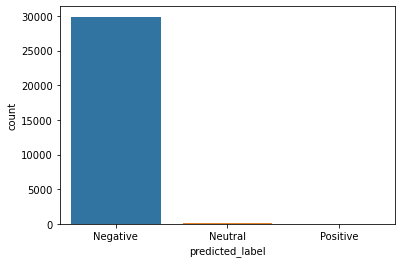

In [ ]:
sns.countplot(new_senti['predicted_label'],label = 'count')

In [ ]:
new_sentiment_count = new_senti["predicted_label"].value_counts()
new_sentiment_count

Negative    29877
Neutral       105
Positive       18
Name: predicted_label, dtype: int64

In [ ]:
positive = new_senti[new_senti['predicted_label']=='Positive']
positive

,text,new_clean_text,new_clean_text2,new_tokens,predicted_label
1711,"Hey, #tristate #IN #IL #KY #Evansville #Evansv...","Hey, tristate IN IL KY Evansville Evansville E...",hey tristate in il ky evansville evansville ev...,"[hey, tristate, il, ky, evansville, evansville...",Positive
2580,Judges for an international design competition...,Judges for an international design competition...,judges for an international design competition...,"[judge, international, design, competition, na...",Positive
2740,Marina Ezugbaia: More than half of the recover...,Marina Ezugbaia: More than half of the recover...,marina ezugbaia more than half of the recoveri...,"[marina, ezugbaia, half, recovery, servictheme...",Positive
8086,People will start making homemade booze ( unhe...,People will start making homemade booze ( unhe...,people will start making homthemade booze unh...,"[people, start, make, homthemade, booze, unhea...",Positive
9054,#COVID19 does not even spare alcoholics. \n\nS...,COVID19 does not even spare alcoholics. \n\nSo...,covid19 does not even spare alcoholics so bus...,"[not, even, spare, alcoholic, bust, myth, stop...",Positive
9081,#IndiaFightsCorona:\n\n#COVID19 does not even ...,IndiaFightsCorona:\n\nCOVID19 does not even sp...,indiafightscorona covid19 does not even spare...,"[indiafightscorona, not, even, spare, alcoholi...",Positive
9158,#IndiaFightsCorona:\n\n#COVID19 does not even ...,IndiaFightsCorona:\n\nCOVID19 does not even sp...,indiafightscorona covid19 does not even spare...,"[indiafightscorona, not, even, spare, alcoholi...",Positive
11852,Due to #COVID19 accompanying relatives are not...,Due to COVID19 accompanying relatives are not ...,due to covid19 accompanying relatives are not ...,"[due, accompany, relative, not, allow, hospita...",Positive
15096,@MattWalshBlog Excellent social distancing on ...,Excellent social distancing on display. I’m ...,excellent social distancing on display im su...,"[excellent, social, distancing, display, im, s...",Positive
15435,@Jim_Jordan You simple have nothing againts #C...,You simple have nothing againts COVID19 ????,you simple have nothing againts covid19,"[simple, nothing, againts]",Positive


In [ ]:
neutral = new_senti[new_senti['predicted_label']=='Neutral']
neutral

,text,new_clean_text,new_clean_text2,new_tokens,predicted_label
170,you know the country is in desperate times whe...,you know the country is in desperate times whe...,you know the country is in desperate times whe...,"[know, country, desperate, time, headline, stu...",Neutral
264,A quienes les gustab los pies sucios? Who enji...,A quienes les gustab los pies sucios? Who enji...,a quienes les gustab los pies sucios who enjiy...,"[quienes, le, gustab, los, pie, sucios, enjiys...",Neutral
764,#COVID19 #pandemic is just a SARS-CoV-2 varia...,COVID19 pandemic is just a SARS-CoV-2 variant...,covid19 pandthemic is just a sarscov2 variant...,"[pandthemic, variant, take, world, get, covidi...",Neutral
1158,How art is helping cities recover from #covid1...,How art is helping cities recover from covid19,how art is helping cities recover from covid19,"[art, help, city, recover]",Neutral
1659,@JJHTweets In #Germany the different States ha...,In Germany the different States have differen...,in germany the different states have differen...,"[germany, different, state, different, timing,...",Neutral
...,...,...,...,...,...
28295,People need hugs and handshakes the most right...,People need hugs and handshakes the most right...,people need hugs and handshakes the most right...,"[people, need, hug, handshakes, right, rule, t...",Neutral
28396,@realDonaldTrump @Yankees #COVID19 began in Ch...,COVID19 began in China...and you failed all ...,covid19 began in chinaand you failed all the...,"[begin, chinaand, fail, way, america, even, bo...",Neutral
29119,"I LOVE seeing this, and applaud the program, b...","I LOVE seeing this, and applaud the program, b...",i love seeing this and applaud the program but...,"[love, see, applaud, program, safe, definitive...",Neutral
29359,Phase 3 is expected to start today.\n\n#COVID1...,Phase 3 is expected to start today.\n\nCOVID19,phase 3 is expected to start today covid19,"[phase, expect, start, today]",Neutral


In [ ]:
negative = new_senti[new_senti['predicted_label']=='Negative']
negative

,text,new_clean_text,new_clean_text2,new_tokens,predicted_label
0,@AvonandsomerRob You do need to differentiate ...,You do need to differentiate between COVID19 ...,you do need to differentiate between covid19 ...,"[need, differentiate, coronavirus, aka, flu]",Negative
1,@PTI_News Roughly one infected person is dying...,Roughly one infected person is dying every th...,roughly one infected person is dying every th...,"[roughly, one, infected, person, die, every, t...",Negative
2,@ShannonFreshour Americans know #COVID19 is a ...,Americans know COVID19 is a Scam of,americans know covid19 is a scam of,"[american, know, scam]",Negative
3,Your haves and haves not shouldn't be the only...,Your haves and haves not shouldn't be the only...,your haves and haves not should not be the onl...,"[not, not, basis, know, flow, blend, associate]",Negative
4,"Quick #COVID19 update: \n\n- first, the pandem...","Quick COVID19 update: \n\n- first, the pandemi...",quick covid19 update first the pandthemic is ...,"[quick, update, first, pandthemic, not, despit...",Negative
...,...,...,...,...,...
29995,#Xauusd buy at 1935\nTp 1950\nStop 1925\n\nDm ...,Xauusd buy at 1935\nTp 1950\nStop 1925\n\nDm f...,xauusd buy at 1935 tp 1950 stop 1925 dm for p...,"[xauusd, buy, tp, stop, dm, prthemium, call, t...",Negative
29996,@neeratanden @realDonaldTrump; patron saint of...,; patron saint of COVID19,patron saint of covid19,"[patron, saint]",Negative
29997,Break the Chain #covid19 Session with ALBA Exe...,Break the Chain covid19 Session with ALBA Exec...,break the chain covid19 session with alba exec...,"[break, chain, session, alba, executive, direc...",Negative
29998,"#😷 It may be a failure to act promptly, but le...",:face_with_medical_mask: It may be a failure t...,face_with_medical_mask it may be a failure to ...,"[may, failure, act, promptly, let, us, not, ma...",Negative


In [ ]:
!pip install WordCloud
from wordcloud import WordCloud

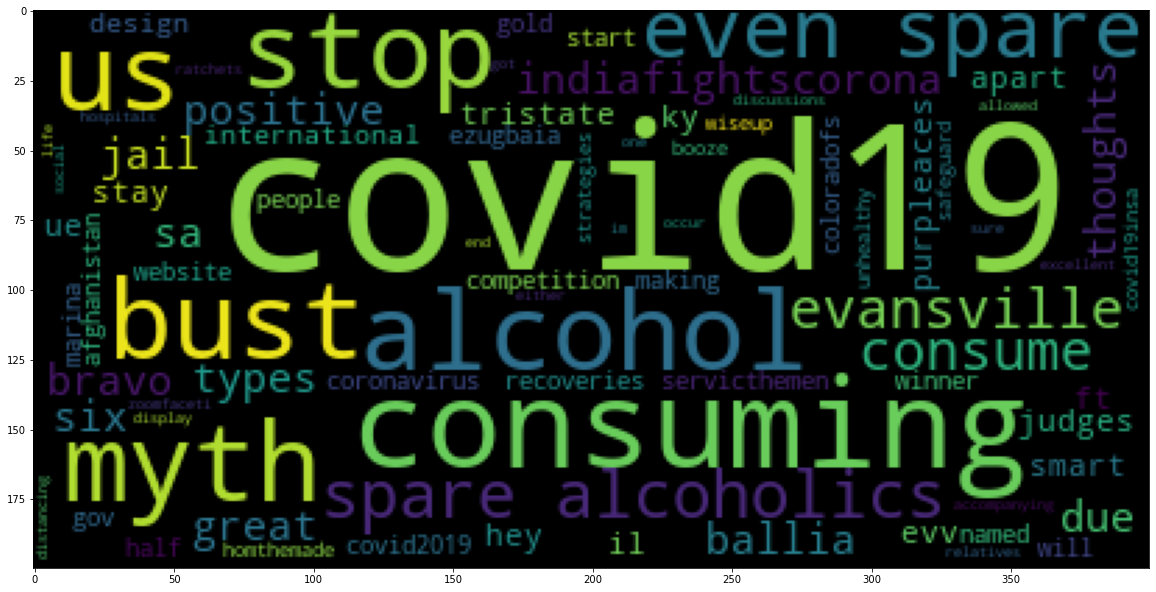

In [ ]:
positive_sentences = positive['new_clean_text2'].to_list()
single_positive = ' '.join(positive_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_positive))

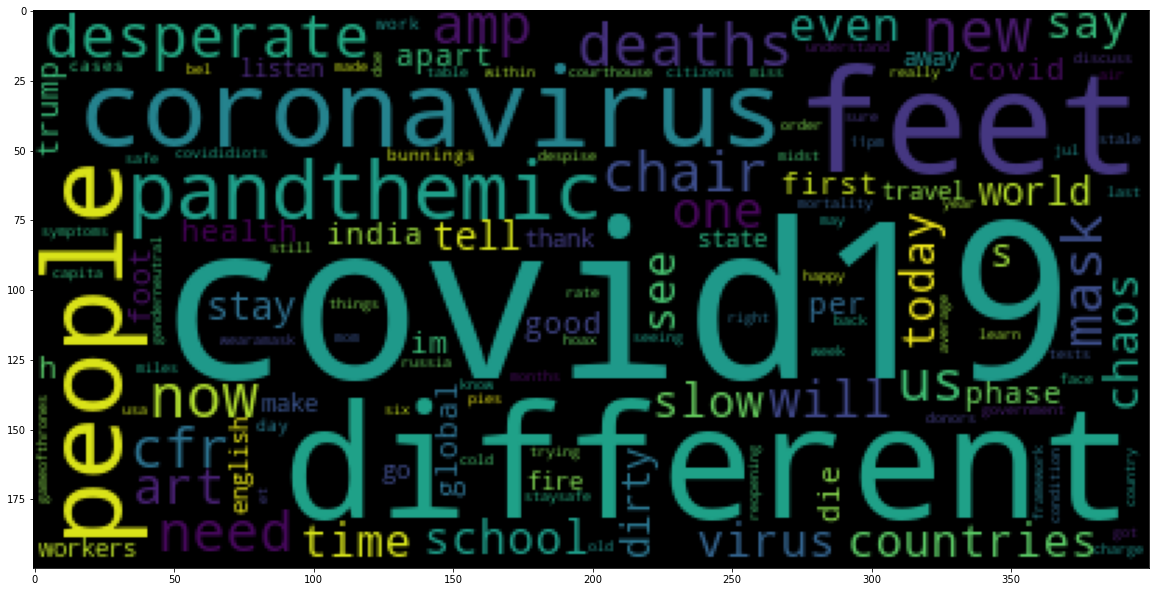

In [ ]:
neutral_sentences = neutral['new_clean_text2'].to_list()
single_neutral = ' '.join(neutral_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_neutral))

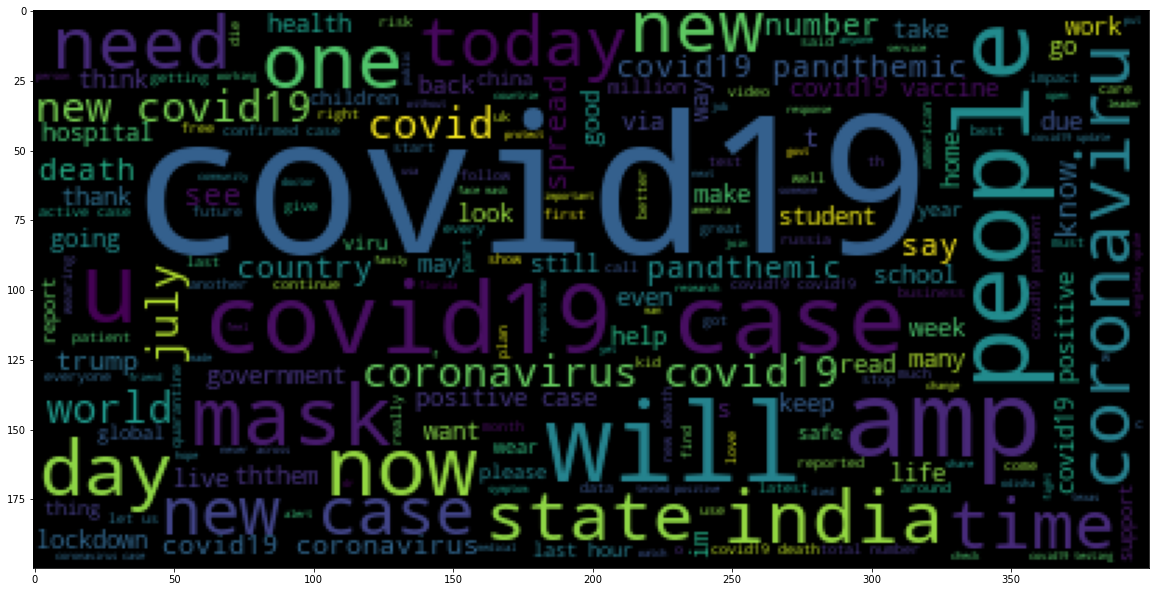

In [ ]:
negative_sentences = negative['new_clean_text2'].to_list()
single_negative = ' '.join(negative_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_negative))